# https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643

In [1]:
import numpy as np
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

In [3]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#Split in X and Y
X = dataset.drop('Class', 1)
y = dataset['Class']

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.decomposition import PCA
pca = PCA()

In [9]:
pca

PCA()

In [10]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [11]:
pca.explained_variance_ratio_

array([0.72226528, 0.23974795, 0.03338117, 0.0046056 ])

In [13]:
pca = PCA(n_components=1)

X_train_1 = pca.fit_transform(X_train)
X_test_1 = pca.transform(X_test)

In [14]:
X_train_1

array([[ 1.27228206e+00],
       [ 1.52231770e-01],
       [-2.18764183e+00],
       [ 9.41913396e-01],
       [ 1.76227837e+00],
       [-8.16806401e-02],
       [-1.89794863e+00],
       [ 9.59395493e-01],
       [ 3.65661204e-01],
       [ 2.31845912e-01],
       [ 1.79730127e+00],
       [-2.40350676e+00],
       [ 1.82199968e+00],
       [-1.98427118e+00],
       [-2.17073306e+00],
       [-2.55598076e-01],
       [ 1.38862320e+00],
       [ 1.93409268e+00],
       [ 1.12243099e+00],
       [ 1.88169499e+00],
       [ 5.43123767e-02],
       [ 2.70365641e+00],
       [ 6.91516012e-01],
       [ 1.30048660e-02],
       [ 1.22853905e+00],
       [ 1.01881714e+00],
       [ 2.57616370e-01],
       [ 1.44310720e+00],
       [ 1.03458720e+00],
       [ 1.43772035e+00],
       [ 3.84673096e-01],
       [-2.18860624e+00],
       [ 1.05608476e+00],
       [ 1.92641524e-01],
       [-1.12363985e-01],
       [ 1.72424265e-01],
       [ 5.48040969e-01],
       [ 1.88178641e+00],
       [-2.2

In [13]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_1, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test_1)

C:\Users\punit.shah1\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy is {}'.format(accuracy_score(y_test, y_pred)))

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]


Accuracy is 0.9333333333333333


# Results with 2 and 3 Principal Components

In [20]:
pca2 = PCA(n_components=2)

X_train_2 = pca2.fit_transform(X_train)
X_test_2 = pca2.transform(X_test)

In [21]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_2, y_train)

# Predicting the Test set results
y_pred_2 = classifier.predict(X_test_2)

C:\Users\punit.shah1\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
cm = confusion_matrix(y_test, y_pred_2)
print(cm)
print("\n")
print('Accuracy is {}'.format(accuracy_score(y_test, y_pred_2)))

[[11  0  0]
 [ 0 10  3]
 [ 0  2  4]]


Accuracy is 0.8333333333333334


In [28]:
pca3 = PCA(n_components=3)

X_train_3 = pca3.fit_transform(X_train)
X_test_3 = pca3.transform(X_test)

In [29]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_3, y_train)

# Predicting the Test set results
y_pred_3 = classifier.predict(X_test_3)

C:\Users\punit.shah1\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
cm = confusion_matrix(y_test, y_pred_3)
print(cm)
print("\n")
print('Accuracy is {}'.format(accuracy_score(y_test, y_pred_3)))

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]


Accuracy is 0.9333333333333333


In [31]:
import matplotlib.pyplot as plt

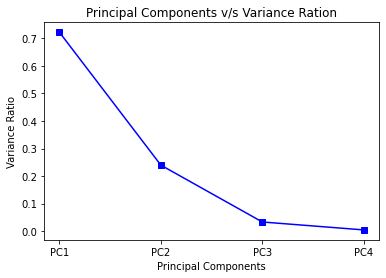

In [46]:
pc4 = PCA(n_components=4)
x_train_4 = pc4.fit_transform(X_train)
plt.plot(['PC1','PC2','PC3','PC4'],pc4.explained_variance_ratio_,'-bs')
plt.title("Principal Components v/s Variance Ration")
plt.xlabel("Principal Components")
plt.ylabel("Variance Ratio")
plt.show()